In [96]:
print('lets goooo')

lets goooo


In [97]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [98]:
df1=pd.read_csv("project.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [99]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [100]:
df2=df1.drop(["availability","society","balcony"],axis="columns")
df2.head()
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [101]:
import math
df2.bath.median()
df2['bath'].fillna(value='2.0',inplace=True)

In [102]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [103]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [104]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [105]:
df3['bhk']=df3['size'].apply(lambda x : int(x.split(" ")[0]))

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6628/930188515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x : int(x.split(" ")[0]))


In [106]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [107]:
df3.drop(['size'],axis='columns')

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,488.00,4


In [108]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [109]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [110]:
df3[~df3['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Super built-up Area,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [111]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [112]:
def convert_sqft_to_num(x):
    tokens= x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [113]:
df3.total_sqft=df3.total_sqft.apply(convert_sqft_to_num)


C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6628/2286937887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.total_sqft=df3.total_sqft.apply(convert_sqft_to_num)


In [114]:
df3.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [115]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6628/3001595115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [116]:
df3.drop(['size'],axis = 1)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [117]:
df3['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [118]:
len(df3.location.unique())


1304

In [119]:
df3.location=df3.location.apply(lambda x: x.strip())
location_stats= df3.groupby('location')['location'].agg("count").sort_values(ascending=False)
location_stats

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6628/69123465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location=df3.location.apply(lambda x: x.strip())


location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [120]:
len(location_stats[location_stats<=10])

1052

In [121]:
location_stats_less_than_10=location_stats[location_stats<=10]
df3.location=df3.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df3.location.unique())

C:\Users\A2ZCON~1\AppData\Local\Temp/ipykernel_6628/1073328785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location=df3.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)


242

In [122]:
df3.drop(['size'],axis = 1)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [ ]:
df4=df3.copy()
df4.head(10)

In [124]:
df4.drop(['size'],axis = 1)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [125]:
#a typical total sqft for a bedroom is 300
df4['total_sqft_per_bedroom']=df4['total_sqft']/df4['bhk']
df4.head(10)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft,total_sqft_per_bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.000000
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.000000
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.000000
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.000000
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248,585.000000
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,683.000000
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182,825.000000
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275,436.666667
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804,170.000000


In [126]:
df4[df4['total_sqft_per_bedroom']<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft,total_sqft_per_bedroom
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804,170.000000
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333,75.000000
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296,168.750000
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000,166.666667
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571,200.000000
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333,200.000000
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091,275.000000
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649,154.800000


In [127]:
df5=df4[-(df4.total_sqft/df4.bhk<300)]
df5.shape

(12559, 9)

In [128]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [129]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft>(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_pps_outlier(df5)
df6.shape

(1428, 9)

TypeError: 'str' object is not callable

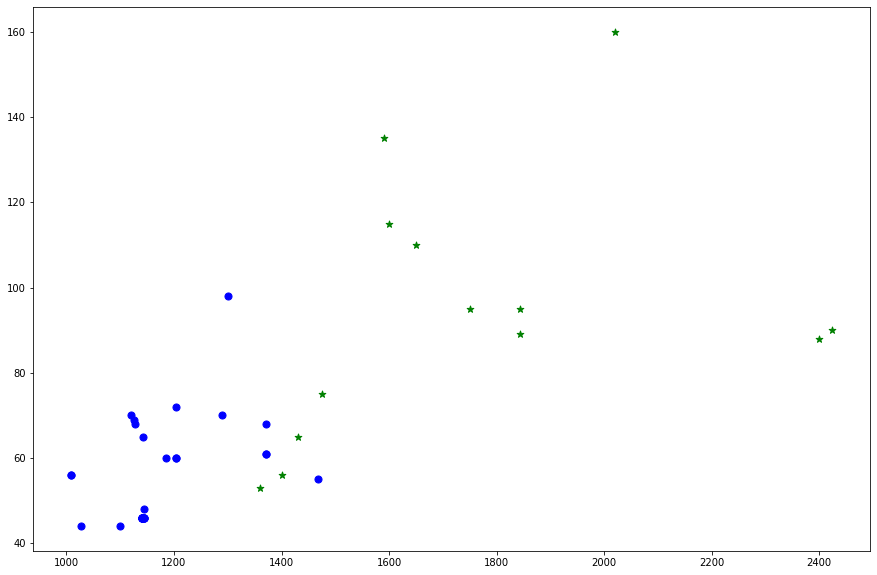

In [130]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3 BHK',s=50)
    plt.xlabel("total square foot area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,"HSR Layout")

In [ ]:
{
    "1" : {
        'mean' :4000,
        'std': 2000,
        'count':34
    },
    "2" : {
        'mean' :4300,
        'std': 2300,
        'count':22
    },

}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):

            bhk_stats[bhk]={

                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
        }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6=remove_bhk_outliers(df5)
df7=df6.copy()
df7.shape
        
        


(8730, 9)

In [ ]:
df5.shape

(12559, 9)

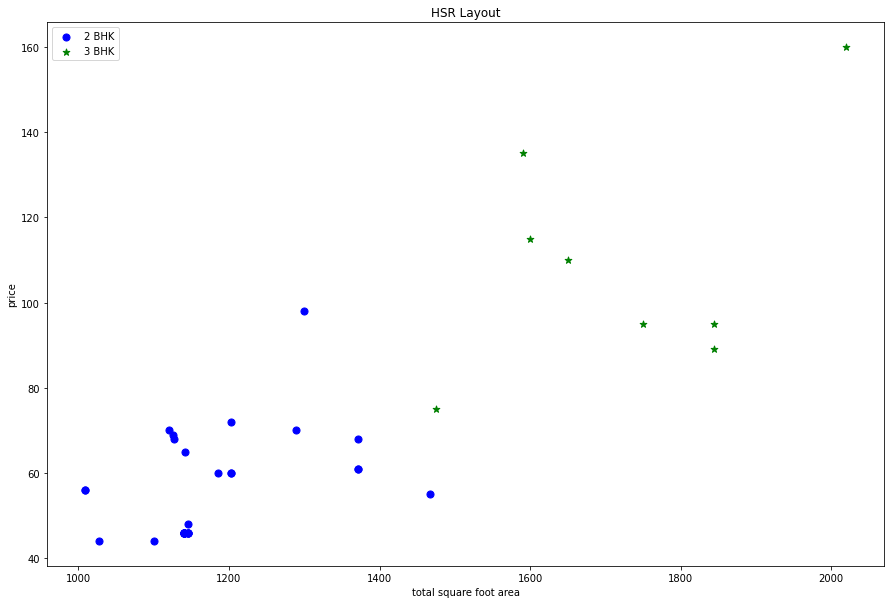

In [ ]:
plot_scatter_chart(df7,"HSR Layout")

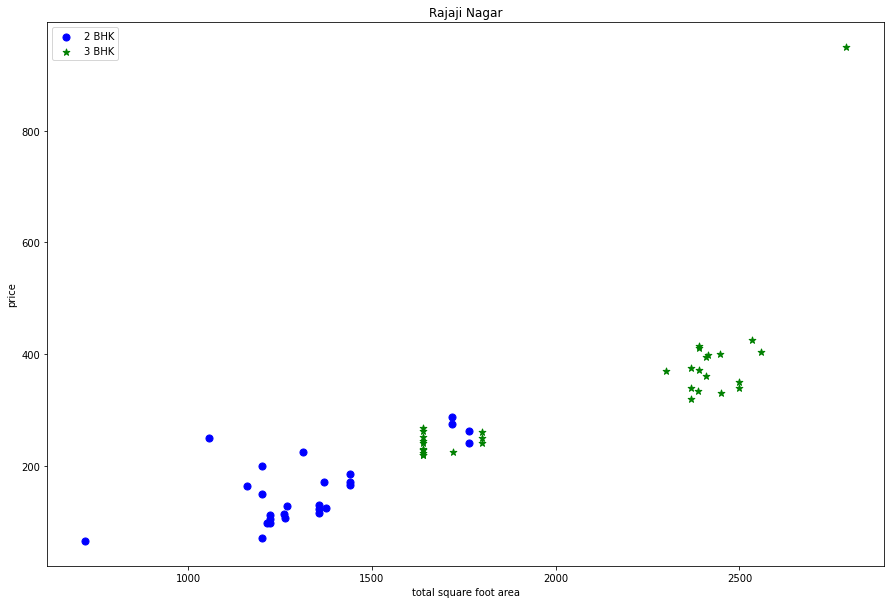

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar")

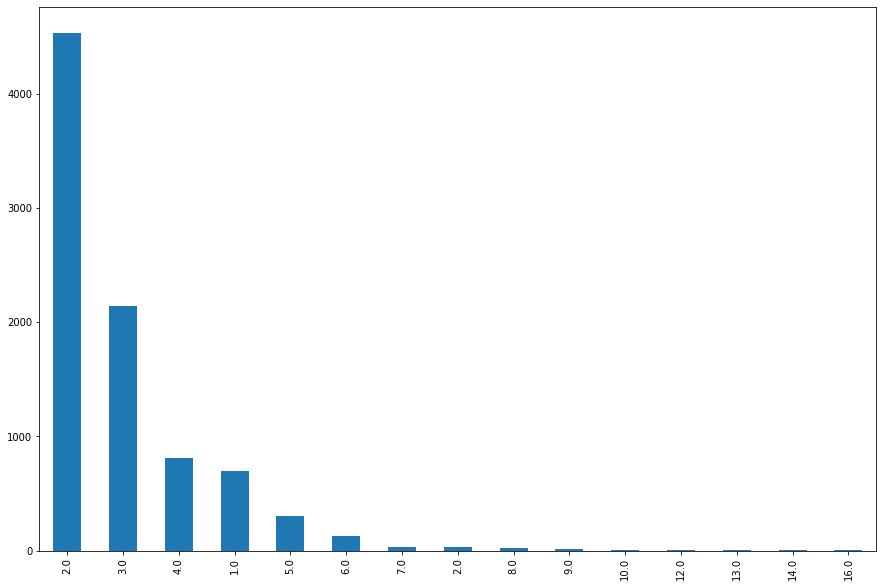

In [ ]:
bathroom_counts=df7['bath'].value_counts()
bathroom_counts.plot(kind='bar')
plt.xlabel=("number of bathrooms")
plt.ylabel=("count")
plt.show()

In [ ]:
df7.head()
df7.bath.unique()


array([2.0, 3.0, 4.0, 5.0, 1.0, '2.0', 8.0, 6.0, 7.0, 9.0, 14.0, 16.0,
       10.0, 12.0, 13.0], dtype=object)

In [ ]:
df7.isnull().sum()

area_type                  0
location                   0
size                       0
total_sqft                46
bath                       0
price                      0
bhk                        0
price_per_sqft            46
total_sqft_per_bedroom    46
dtype: int64

In [ ]:
df7.bath.describe()

count     8730.0
unique      15.0
top          2.0
freq      4533.0
Name: bath, dtype: float64

In [ ]:
df8=df7.drop(['size','price_per_sqft','total_sqft_per_bedroom'],axis='columns')
df8.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4


In [ ]:
df8.isnull().sum()

area_type      0
location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [ ]:
df8.dropna(subset=['total_sqft'],inplace=True)

In [ ]:
df8.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [ ]:
dummies=pd.get_dummies(df8.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9=pd.concat([df8,dummies],axis='columns')
df9.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10=df9.drop(['location','area_type'],axis='columns')

df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


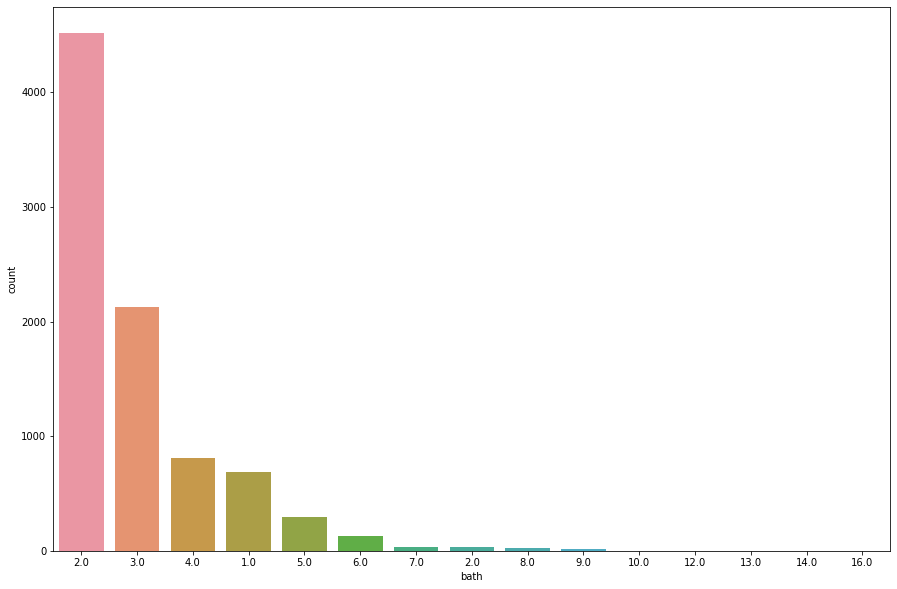

In [ ]:
import seaborn as sns 
sns.countplot(x='bath',data=df10,order=df10['bath'].value_counts().index)
plt.show()

In [ ]:
df10.bath.unique()

array([2.0, 3.0, 4.0, 5.0, 1.0, '2.0', 8.0, 6.0, 7.0, 9.0, 14.0, 16.0,
       10.0, 12.0, 13.0], dtype=object)

In [ ]:
df10['bath']=df10['bath'].astype(str).apply(lambda x: int(x.split('.')[0]))

In [ ]:
df10.bath.unique()

array([ 2,  3,  4,  5,  1,  8,  6,  7,  9, 14, 16, 10, 12, 13],
      dtype=int64)

In [193]:
df11=df10.copy()


In [ ]:
df11=df11.drop(df11[df11['bath']>df11['bhk']+2].index)
df11.head(2)
df12=df11.copy()

In [ ]:
df12.dropna(inplace=True)

In [ ]:
df13=df12.copy()

In [192]:
x=df13.drop('price',axis=1)


In [191]:
y=df13.price


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6714414535794873

In [180]:
#------------------------------------- USE K FOLD VALIDATION FOR MEASURING THE ACCURACY OF LINEAR REGRESSION --------------------------------
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.63717139, 0.57935834, 0.65252284, 0.66675225, 0.69686028])

In [144]:
y_pred=model.predict(x_test)

In [145]:
print(y_pred)

[595.22134575 167.89916868  55.78403886 ...  38.43938898  34.21949942
 123.86813082]


In [ ]:
#--------------------------------------------         DECISION TREE          ---------------------------------------------------------------

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5724740817948082

In [182]:
#------------------------------------- USE K FOLD VALIDATION FOR MEASURING THE ACCURACY OF DECISION TREE REGRESSION --------------------------------
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)

array([0.67246981, 0.55862567, 0.62156182, 0.5120782 , 0.58861649])

In [ ]:
Y_pred=clf.predict(x_test)
print(Y_pred)

[350.   146.5  120.   ...  11.75 110.    95.  ]


In [ ]:
#---------------------------------------------- GRID CV SEARCH --------------------------------------------------------------------------

In [ ]:
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
param_grid={'n_estimators':[10,50,100],'max_depth':[None,5,5,10],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
rf=RandomForestRegressor()
grid_search=GridSearchCV(rf,param_grid,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.score(x_test,y_test)


0.7099462151859751

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.7176567693403783

In [183]:
#------------------------------------- USE K FOLD VALIDATION FOR MEASURING THE ACCURACY OF RANDOM FOREST REGRESSION --------------------------------
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),x,y,cv=cv)

array([0.75766536, 0.74121515, 0.67851731, 0.7167975 , 0.67490617])

In [ ]:
y0_pred=rf.predict(x_test)

In [ ]:
y1_pred=grid_search.predict(x_test)

In [ ]:
print(y1_pred)

[560.6875947  140.87757906 109.33394302 ...  18.81553234 111.1948239
  93.92150268]


In [184]:
from sklearn.metrics import mean_squared_error
param_grid_lr={'fit_intercept':[True,False]}
param_grid_dt={'max_depth':[1,2,3,4,5,6,7,8,9,10]}
param_grid_rf={'max_depth':[5,10,15]}
models={'Linear Regression':(LinearRegression(),param_grid_lr),'decision tree': (DecisionTreeRegressor(),param_grid_dt),'random forest':(RandomForestRegressor(),param_grid_rf)}
scoring='neg_mean_squared_error'
cv=5
best_models=None
best_mse=float('inf')
for name,(model,param_grid)in models.items():
    grid=GridSearchCV(model,param_grid,cv=cv,scoring=scoring)
    mse=mean_squared_error(y_test,y1_pred)
    print(f'{name}:Best Parameters:{grid_search.best_params_},MSE:{mse:2f}')
    if mse<best_mse:
        best_model=grid_search.best_estimator_
        best_mse=mse
print(f'Best model:{best_model}')





Linear Regression:Best Parameters:{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10},MSE:45723.332298
decision tree:Best Parameters:{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10},MSE:45723.332298
random forest:Best Parameters:{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10},MSE:45723.332298
Best model:RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=10)


In [ ]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [185]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    v=np.zeros(len(x.columns))
    v[0]=sqft
    v[1]=bath
    v[2]=bhk
    if loc_index>=0:
        v[loc_index]=1
    return rf.predict([v])[0]
    


In [190]:
predict_price('Whitefield',1170,4,2)

c:\Users\a2z control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


136.95833333333334

In [188]:
predict_price('5th Phase JP Nagar',1170,2,2)

c:\Users\a2z control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


50.66788333333332

In [187]:
predict_price('Whitefield',1170,3,2)

c:\Users\a2z control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


64.638975

In [186]:
predict_price('6th Phase JP Nagar',1170,2,2)

c:\Users\a2z control\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


99.5875